In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Importing Panel Data and Basic EDA

In [2]:
panel_data = pd.read_csv('Final_data.csv')
panel_data

,Unnamed: 0,Revenue,Gross_Profit,Net_Income,Year,Semi,Vader_score,Review,Company,Quarter
0,0,5038.0,5038.0,79.0,2023,1,0.336862,18465,Currys,NaN
1,1,4473.0,4473.0,-560.0,2022,2,0.437670,16688,Currys,NaN
2,2,5339.0,5339.0,29.0,2022,1,0.396808,22212,Currys,NaN
3,3,4783.0,4783.0,42.0,2021,2,0.414442,15667,Currys,NaN
4,4,5471.0,5471.0,-17.0,2021,1,0.294618,20457,Currys,NaN
...,...,...,...,...,...,...,...,...,...,...
108,15,1297.7,518.3,185.7,2016,1,0.091516,37,WesternUnion,1.0
109,16,1383.6,584.2,189.3,2015,2,0.493521,145,WesternUnion,2.0
110,17,1320.9,549.1,203.9,2015,1,0.029930,10,WesternUnion,1.0
111,18,1405.6,577.8,193.8,2014,2,0.709600,1,WesternUnion,2.0


In [3]:
panel_data.describe()

,Unnamed: 0,Revenue,Gross_Profit,Net_Income,Year,Semi,Vader_score,Review,Quarter
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,37.000000
mean,8.946903,1981.917699,1396.581947,111.619469,2018.371681,1.433628,0.253925,4093.185841,1.486486
std,5.504610,1622.944468,1628.896055,155.826767,2.765200,0.497783,0.248485,7355.241964,0.506712
min,0.000000,45.400000,24.600000,-560.000000,2013.000000,1.000000,-0.276319,1.000000,1.000000
25%,4.000000,699.100000,507.500000,35.000000,2016.000000,1.000000,0.056321,139.000000,1.000000
50%,9.000000,1378.900000,643.000000,83.800000,2018.000000,1.000000,0.259891,925.000000,1.000000
75%,14.000000,2506.400000,1275.100000,203.000000,2021.000000,2.000000,0.427291,4387.000000,2.000000
max,19.000000,5706.900000,5657.000000,614.800000,2023.000000,2.000000,0.798392,36627.000000,2.000000


In [4]:
panel_data = panel_data.drop(columns=['Unnamed: 0', 'Quarter'])
panel_data

,Revenue,Gross_Profit,Net_Income,Year,Semi,Vader_score,Review,Company
0,5038.0,5038.0,79.0,2023,1,0.336862,18465,Currys
1,4473.0,4473.0,-560.0,2022,2,0.437670,16688,Currys
2,5339.0,5339.0,29.0,2022,1,0.396808,22212,Currys
3,4783.0,4783.0,42.0,2021,2,0.414442,15667,Currys
4,5471.0,5471.0,-17.0,2021,1,0.294618,20457,Currys
...,...,...,...,...,...,...,...,...
108,1297.7,518.3,185.7,2016,1,0.091516,37,WesternUnion
109,1383.6,584.2,189.3,2015,2,0.493521,145,WesternUnion
110,1320.9,549.1,203.9,2015,1,0.029930,10,WesternUnion
111,1405.6,577.8,193.8,2014,2,0.709600,1,WesternUnion


## Variation in Sentiments

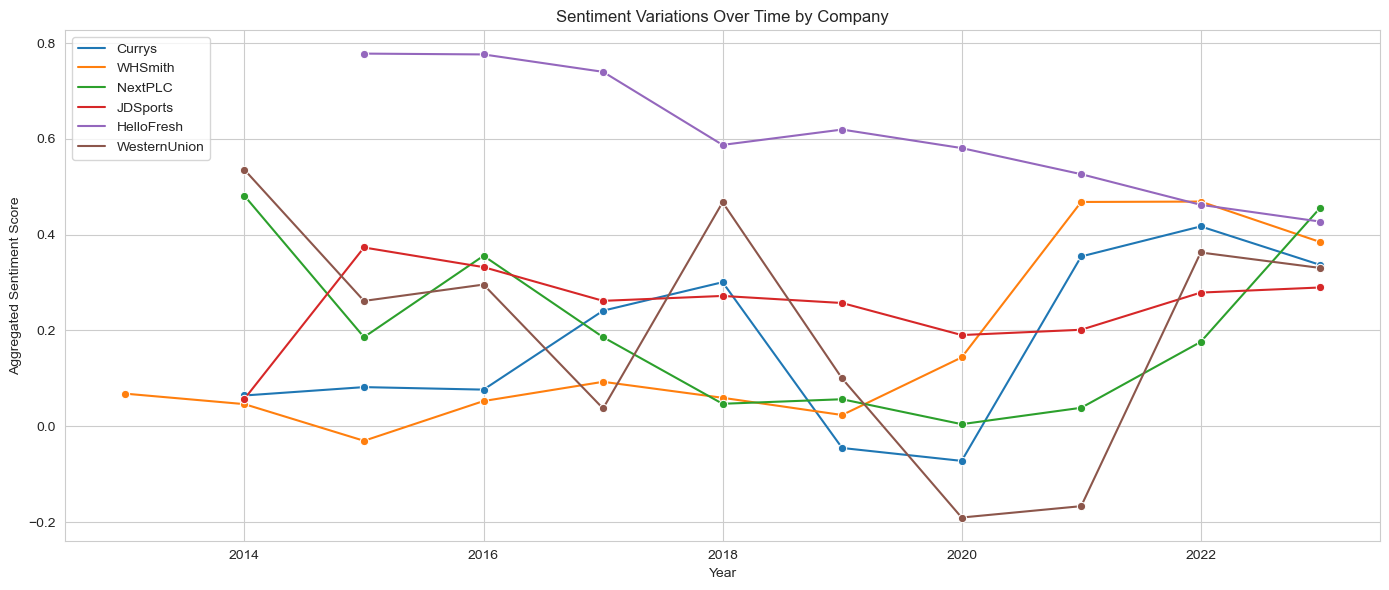

In [5]:
# Setting up the style for the plots
sns.set_style("whitegrid")

# Plotting sentiment variations over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=panel_data, x='Year', y='Vader_score', hue='Company', marker='o',ci=None)
plt.title('Sentiment Variations Over Time by Company')
plt.ylabel('Aggregated Sentiment Score')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Taking Logarithms of Financial Metrics

In [6]:
panel_data['log_Revenue'] = np.log(panel_data['Revenue'])
panel_data['log_Gross_Profit'] = np.log(panel_data['Gross_Profit'])
panel_data

,Revenue,Gross_Profit,Net_Income,Year,Semi,Vader_score,Review,Company,log_Revenue,log_Gross_Profit
0,5038.0,5038.0,79.0,2023,1,0.336862,18465,Currys,8.524764,8.524764
1,4473.0,4473.0,-560.0,2022,2,0.437670,16688,Currys,8.405815,8.405815
2,5339.0,5339.0,29.0,2022,1,0.396808,22212,Currys,8.582794,8.582794
3,4783.0,4783.0,42.0,2021,2,0.414442,15667,Currys,8.472823,8.472823
4,5471.0,5471.0,-17.0,2021,1,0.294618,20457,Currys,8.607217,8.607217
...,...,...,...,...,...,...,...,...,...,...
108,1297.7,518.3,185.7,2016,1,0.091516,37,WesternUnion,7.168349,6.250554
109,1383.6,584.2,189.3,2015,2,0.493521,145,WesternUnion,7.232444,6.370243
110,1320.9,549.1,203.9,2015,1,0.029930,10,WesternUnion,7.186069,6.308281
111,1405.6,577.8,193.8,2014,2,0.709600,1,WesternUnion,7.248220,6.359228


In [7]:
panel_data.describe()

,Revenue,Gross_Profit,Net_Income,Year,Semi,Vader_score,Review,log_Revenue,log_Gross_Profit
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1981.917699,1396.581947,111.619469,2018.371681,1.433628,0.253925,4093.185841,7.211463,6.702560
std,1622.944468,1628.896055,155.826767,2.765200,0.497783,0.248485,7355.241964,0.970495,1.052140
min,45.400000,24.600000,-560.000000,2013.000000,1.000000,-0.276319,1.000000,3.815512,3.202746
25%,699.100000,507.500000,35.000000,2016.000000,1.000000,0.056321,139.000000,6.549794,6.229497
50%,1378.900000,643.000000,83.800000,2018.000000,1.000000,0.259891,925.000000,7.229041,6.466145
75%,2506.400000,1275.100000,203.000000,2021.000000,2.000000,0.427291,4387.000000,7.826603,7.150780
max,5706.900000,5657.000000,614.800000,2023.000000,2.000000,0.798392,36627.000000,8.649431,8.640649


## Fixed Effects Regression

## Hypothesis 1

In [8]:
h1_model_revenue = smf.ols(formula='log_Revenue ~ Vader_score + C(Company) + C(Year)', data=panel_data)
h1_results_revenue = h1_model_revenue.fit()
print(h1_results_revenue.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     19.87
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.15e-23
Time:                        12:46:02   Log-Likelihood:                -73.888
No. Observations:                 113   AIC:                             181.8
Df Residuals:                      96   BIC:                             228.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [9]:
h1_model_grossprofit = smf.ols(formula='log_Gross_Profit ~ Vader_score + C(Company) + C(Year)', data=panel_data)
h1_results_grossprofit = h1_model_grossprofit.fit()
print(h1_results_grossprofit.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Gross_Profit   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     23.49
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.73e-26
Time:                        12:46:03   Log-Likelihood:                -75.610
No. Observations:                 113   AIC:                             185.2
Df Residuals:                      96   BIC:                             231.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [10]:
h1_model_income = smf.ols(formula='Net_Income ~ Vader_score + C(Company) + C(Year)', data=panel_data)
h1_results_income = h1_model_income.fit()
print(h1_results_income.summary())

                            OLS Regression Results                            
Dep. Variable:             Net_Income   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.874
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           3.48e-10
Time:                        12:46:03   Log-Likelihood:                -687.21
No. Observations:                 113   AIC:                             1408.
Df Residuals:                      96   BIC:                             1455.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Hypothesis 2

In [11]:
h2_model_revenue = smf.ols(formula='log_Revenue ~ Review + C(Company) + C(Year)', data=panel_data)
h2_results_revenue = h2_model_revenue.fit()
print(h2_results_revenue.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     19.04
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           5.18e-23
Time:                        12:46:03   Log-Likelihood:                -75.741
No. Observations:                 113   AIC:                             185.5
Df Residuals:                      96   BIC:                             231.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [12]:
h2_model_grossprofit = smf.ols(formula='log_Gross_Profit ~ Review + C(Company) + C(Year)', data=panel_data)
h2_results_grossprofit = h2_model_grossprofit.fit()
print(h2_results_grossprofit.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Gross_Profit   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     22.28
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.90e-25
Time:                        12:46:03   Log-Likelihood:                -77.979
No. Observations:                 113   AIC:                             190.0
Df Residuals:                      96   BIC:                             236.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [13]:
h2_model_income = smf.ols(formula='Net_Income ~ Review + C(Company) + C(Year)', data=panel_data)
h2_results_income = h2_model_income.fit()
print(h2_results_income.summary())

                            OLS Regression Results                            
Dep. Variable:             Net_Income   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     7.031
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.08e-10
Time:                        12:46:03   Log-Likelihood:                -686.53
No. Observations:                 113   AIC:                             1407.
Df Residuals:                      96   BIC:                             1453.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Testing the impact of both Volume and Valence of reviews in the same model

In [14]:
h12_model_revenue = smf.ols(formula='log_Revenue ~ Review + Vader_score + C(Company) + C(Year)', data=panel_data)
h12_results_revenue = h12_model_revenue.fit()
print(h12_results_revenue.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     19.31
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.19e-23
Time:                        12:46:03   Log-Likelihood:                -72.036
No. Observations:                 113   AIC:                             180.1
Df Residuals:                      95   BIC:                             229.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [15]:
h12_model_grossprofit = smf.ols(formula='log_Gross_Profit ~ Review + Vader_score + C(Company) + C(Year)', data=panel_data)
h12_results_grossprofit = h12_model_grossprofit.fit()
print(h12_results_grossprofit.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Gross_Profit   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     22.90
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.58e-26
Time:                        12:46:03   Log-Likelihood:                -73.561
No. Observations:                 113   AIC:                             183.1
Df Residuals:                      95   BIC:                             232.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [16]:
h12_model_income = smf.ols(formula='Net_Income ~ Review + Vader_score + C(Company) + C(Year)', data=panel_data)
h12_results_income = h12_model_income.fit()
print(h12_results_income.summary())

                            OLS Regression Results                            
Dep. Variable:             Net_Income   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     6.692
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           3.50e-10
Time:                        12:46:03   Log-Likelihood:                -685.86
No. Observations:                 113   AIC:                             1408.
Df Residuals:                      95   BIC:                             1457.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Hypothesis 3
For hypothesis 3. We create 1 year, 3 year and 6 year lagged variables to measure the delayed effect of review valence and review volume on financial performance.

### Create Lag Variables

In [22]:
# Lag for 1 year
panel_data['Review_lag1'] = panel_data.groupby('Company')['Review'].shift(1)

# Lag for 3 years
panel_data['Review_lag3'] = panel_data.groupby('Company')['Review'].shift(3)

# Lag for 6 years
panel_data['Review_lag6'] = panel_data.groupby('Company')['Review'].shift(6)

panel_data['Vader_lag1'] = panel_data.groupby('Company')['Vader_score'].shift(1)

# Lag for 3 years
panel_data['Vader_lag3'] = panel_data.groupby('Company')['Vader_score'].shift(3)

# Lag for 6 years
panel_data['Vader_lag6'] = panel_data.groupby('Company')['Vader_score'].shift(6)

In [23]:
panel_data

,Revenue,Gross_Profit,Net_Income,Year,Semi,Vader_score,Review,Company,log_Revenue,log_Gross_Profit,Review_lag1,Review_lag3,Review_lag6,Vader_lag1,Vader_lag3,Vader_lag6
0,5038.0,5038.0,79.0,2023,1,0.336862,18465,Currys,8.524764,8.524764,NaN,NaN,NaN,NaN,NaN,NaN
1,4473.0,4473.0,-560.0,2022,2,0.437670,16688,Currys,8.405815,8.405815,18465.0,NaN,NaN,0.336862,NaN,NaN
2,5339.0,5339.0,29.0,2022,1,0.396808,22212,Currys,8.582794,8.582794,16688.0,NaN,NaN,0.437670,NaN,NaN
3,4783.0,4783.0,42.0,2021,2,0.414442,15667,Currys,8.472823,8.472823,22212.0,18465.0,NaN,0.396808,0.336862,NaN
4,5471.0,5471.0,-17.0,2021,1,0.294618,20457,Currys,8.607217,8.607217,15667.0,16688.0,NaN,0.414442,0.437670,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1297.7,518.3,185.7,2016,1,0.091516,37,WesternUnion,7.168349,6.250554,3216.0,112.0,139.0,0.500117,-0.053975,-0.276319
109,1383.6,584.2,189.3,2015,2,0.493521,145,WesternUnion,7.232444,6.370243,37.0,90.0,932.0,0.091516,0.128416,0.408175
110,1320.9,549.1,203.9,2015,1,0.029930,10,WesternUnion,7.186069,6.308281,145.0,3216.0,5189.0,0.493521,0.500117,0.526892
111,1405.6,577.8,193.8,2014,2,0.709600,1,WesternUnion,7.248220,6.359228,10.0,37.0,112.0,0.029930,0.091516,-0.053975


In [24]:
h3_model_revenue = smf.ols(formula='log_Revenue ~ Review + Review_lag1 + Review_lag3 + Review_lag6 + Vader_score + Vader_lag1 + Vader_lag3 + Vader_lag6 + C(Company) + C(Year)', data=panel_data)
h3_results_revenue = h3_model_revenue.fit()
print(h3_results_revenue.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     29.49
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.04e-22
Time:                        13:56:37   Log-Likelihood:                -15.396
No. Observations:                  77   AIC:                             72.79
Df Residuals:                      56   BIC:                             122.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [25]:
h3_model_grossprofit = smf.ols(formula='log_Gross_Profit ~ Review + Review_lag1 + Review_lag3 + Review_lag6 + Vader_score + Vader_lag1 + Vader_lag3 + Vader_lag6 + C(Company) + C(Year)', data=panel_data)
h3_results_grossprofit = h3_model_grossprofit.fit()
print(h3_results_grossprofit.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Gross_Profit   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     35.74
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           8.43e-25
Time:                        17:02:10   Log-Likelihood:                -15.169
No. Observations:                  77   AIC:                             72.34
Df Residuals:                      56   BIC:                             121.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [26]:
h3_model_income = smf.ols(formula='Net_Income ~ Review + Review_lag1 + Review_lag3 + Review_lag6 + Vader_score + Vader_lag1 + Vader_lag3 + Vader_lag6 + C(Company) + C(Year)', data=panel_data)
h3_results_income = h3_model_income.fit()
print(h3_results_income.summary())

                            OLS Regression Results                            
Dep. Variable:             Net_Income   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     5.768
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.04e-07
Time:                        17:11:07   Log-Likelihood:                -448.07
No. Observations:                  77   AIC:                             938.1
Df Residuals:                      56   BIC:                             987.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           